In [1]:
import numpy as np
import pygimli as pg
import  pygimli.meshtools       as     mt
from pygimli.viewer import pv
from pygimli.physics.gravimetry import MagneticsModelling


No module named 'panel'.
You need to install this optional dependency to use interactive 3D visualizations within Jupyter notebooks.


20/12/22 - 09:17:32 - pyGIMLi - WARNING - Deprecated code usage at:
20/12/22 - 09:17:34 - pyGIMLi - WARNING - None.<module>(C:\Users\azieg\AppData\Local\Temp\ipykernel_13484\2538808863.py:7)
Mesh::cellMarker() Mesh::cellMarkers()
20/12/22 - 09:17:37 - pyGIMLi - WARNING - Deprecated code usage at:
20/12/22 - 09:17:37 - pyGIMLi - WARNING - None.<module>(C:\Users\azieg\AppData\Local\Temp\ipykernel_13484\2538808863.py:15)
Mesh::cellMarker() Mesh::cellMarkers()
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Install ``panel`` to use this feature

Falling back to a static output.
  warnings.warn(


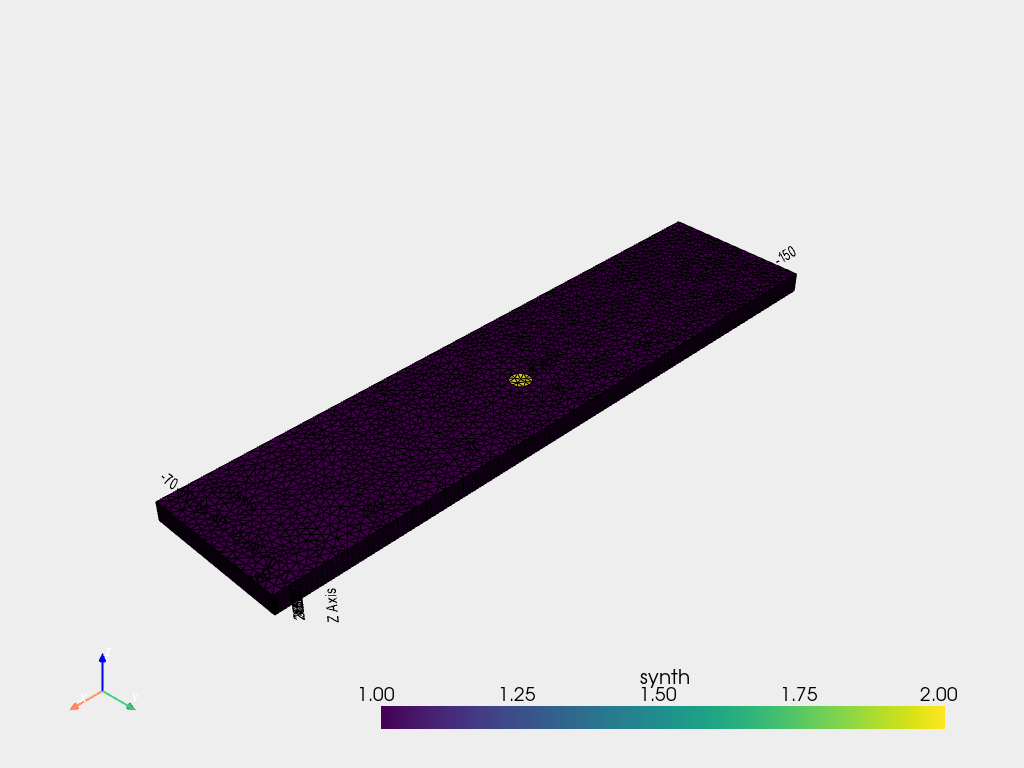

(<pyvista.plotting.plotting.Plotter at 0x21a94f894f0>, None)

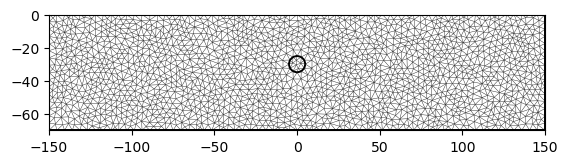

In [2]:
# Create layered subsurface
world = mt.createWorld([-150,-70], [150, 0])
circle = mt.createCircle(pos=[0, -30], radius=5, marker=2)
geom = world + circle
mesh = mt.createMesh(geom, area=10)

vv = np.array(mesh.cellMarker()) # List with RegionMarker for each cell
mesh["synth"] = vv

pg.show(mesh, showMesh=True, label="synth")

z=np.linspace(1,10,11)
mesh3d = mt.createMesh3D(mesh, z, topMarker=0, bottomMarker=0) 

v = np.array(mesh3d.cellMarker()) # List with RegionMarker for each cell
mesh3d["synth"] = v

pg.show(mesh3d, showMesh=True, label="synth")

In [8]:
F, I, D = 50000e-9, 75, 25
H = F * np.cos(np.deg2rad(I))
X = H * np.cos(np.deg2rad(D))
Y = H * np.sin(np.deg2rad(D))
Z = F * np.sin(np.deg2rad(I))
igrf = [D, I, H, X, Y, Z, F]

points3d = np.array([[x,-30,0] for x in np.linspace(-100,100,200)])
points = np.array([[x,0] for x in np.linspace(-100,100,21)])
# The forward operator
cmp = ["TFA"]  # ["Bx", "By", "Bz"]

In [9]:
fop = pg.physics.gravimetry.MagneticsModelling(mesh, points, cmp, igrf)

   0%|          |0/21 [00:00 < ?]

ValueError: operands could not be broadcast together with shapes (5242,2,3) (2,) 

In [ ]:
model = pg.Vector(mesh3d.cellCount(), 1.0)
data = fop.response(mesh3d["synth"])

In [ ]:
data

In [ ]:
dx = 50
x = np.arange(0., 1001, dx)
y = np.arange(0., 1001, dx)
z = np.arange(0., 501, dx)
grid = pg.createGrid(x, y, z)
print(grid)

v = np.zeros((len(z)-1, len(y)-1, len(x)-1))
for i in range(7):
    v[1+i, 11-i:16-i, 7:13] = 0.05

grid["synth"] = v.ravel()

pl, _ = pg.show(grid, style="wireframe", hold=True)
pv.drawMesh(pl, grid, label="synth", style="surface", cMap="Spectral_r",
            filter={"threshold": dict(value=0.05, scalars="synth")})
pl.camera_position = "yz"
pl.camera.roll = 90
pl.camera.azimuth = 180 - 15
pl.camera.elevation = 10
pl.camera.zoom(1.2)
pl.show()


F, I, D = 50000e-9, 75, 25
H = F * np.cos(np.deg2rad(I))
X = H * np.cos(np.deg2rad(D))
Y = H * np.sin(np.deg2rad(D))
Z = F * np.sin(np.deg2rad(I))
igrf = [D, I, H, X, Y, Z, F]

py, px = np.meshgrid(x, y)
px = px.ravel()
py = py.ravel()
points = np.column_stack((px, py, -np.ones_like(px)*20))

# The forward operator
cmp = ["TFA"]  # ["Bx", "By", "Bz"]
fop = MagneticsModelling(grid, points, cmp, igrf)
model = pg.Vector(grid.cellCount(), 1.0)
data = fop.response(grid["synth"])

In [ ]:
mesh3d
